<a href="https://colab.research.google.com/github/hasnafauziyah26/Cakap_Capstone_Project_Data_Scientist/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Package dan Data

In [3]:
#Install package yang akan digunakan
!pip install scikit-plot

In [4]:
#Memanggil package yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro #Uji statistik normalitas
from sklearn.preprocessing import LabelEncoder #Membuat data object menjadi kategorik (numerik)
from sklearn.preprocessing import StandardScaler #Transformasi data
from sklearn.model_selection import train_test_split #Membagi data menjadi data train dan data test
from sklearn.linear_model import LinearRegression #Model regresi linear
from sklearn.neighbors import KNeighborsRegressor #Model KNN
from sklearn.tree import DecisionTreeRegressor #Model decision tree
from sklearn.ensemble import RandomForestRegressor #Model random forest
from sklearn.svm import SVR #Model SVM RBF
from sklearn.neural_network import MLPRegressor #Model MLP
from sklearn.model_selection import GridSearchCV #Hyperparameter
from sklearn.metrics import mean_squared_error #Evaluasi model RMSE
import scikitplot as skplt

In [5]:
#Memanggil data dan melihat data
data = pd.read_csv("https://raw.githubusercontent.com/hasnafauziyah26/Cakap_Capstone_Project_Data_Scientist/main/garments_worker_productivity.csv")
data.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


# Data Understanding

In [221]:
#Memeriksa informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [222]:
#Mengganti nama kolom
data = data.rename(columns={'smv':'standard_minute_value','wip': 'work_in_progress'})

In [223]:
#Memeriksa dimensi data
data.shape

(1197, 15)

In [224]:
target = data[['targeted_productivity', 'actual_productivity']].copy()
target['achieved'] = target['targeted_productivity'] < target['actual_productivity']
value = target['achieved'].value_counts()
print(f"achieved")
print(f"True {(value[True]/len(target)):.3f}")
print(f"False {(value[False]/len(target)):.3f}")

achieved
True 0.726
False 0.274


# Eksplorasi Data



##Duplikat

In [225]:
# Pemeriksaan Duplikasi Data
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Data duplikat:")
    print(duplicate_rows)
else:
    print("Tidak ada data duplikat.")

Tidak ada data duplikat.


##Data Hilang

In [226]:
#Memeriksa nilai yang hilang pada data
data.isna().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
standard_minute_value    False
work_in_progress          True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

In [227]:
#Mengetahui jumlah data yang hilang
def missing_values(data):
    missing_value = data.isna().sum()
    missing_columns = missing_value[missing_value > 0]

    if missing_columns.empty:
        print("Tidak ada nilai yang hilang dalam dataset.")
    else:
        print("Kolom dengan nilai yang hilang:")
        for col, val in missing_columns.items():
            print(f"{col}: {val} nilai yang hilang ({val / len(data) * 100:.3f}%)")

missing_values(data)

Kolom dengan nilai yang hilang:
work_in_progress: 506 nilai yang hilang (42.272%)


##Data Anomali

In [228]:
#Mengubah tipe data kolom date menjadi datetime64
data['date'] = pd.to_datetime(data['date'])

In [229]:
#Melihat isi data pada data yang berupa object
obj_columns = data.select_dtypes(include=['object']).columns
for col in obj_columns:
    print(f"Variabel: {col}")
    print(data[col].unique())
    print("\n")

Variabel: quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


Variabel: department
['sweing' 'finishing ' 'finishing']


Variabel: day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']




In [230]:
#Memperbaiki penulisan pada variabel department
data['department'] = data['department'].str.strip()
print(data['department'].unique())

['sweing' 'finishing']


In [231]:
#Melihat isi data pada data yang berupa numerik
num_columns = data.select_dtypes(include=['number']).columns
for col in num_columns:
    print(f"{col} {len(data[data[col]<0])}")

team 0
targeted_productivity 0
standard_minute_value 0
work_in_progress 0
over_time 0
incentive 0
idle_time 0
idle_men 0
no_of_style_change 0
no_of_workers 0
actual_productivity 0


In [232]:
#Melihat nilai pada no_of_workers yang bukan bilangan bulat
data[data['no_of_workers']%1!=0]

,date,quarter,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,2015-01-01,Quarter1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2015-02-15,Quarter3,sweing,Sunday,5,0.80,30.10,679.0,7140,0,0.0,0,0,59.5,0.722569
780,2015-02-15,Quarter3,sweing,Sunday,4,0.75,30.10,919.0,7140,0,0.0,0,1,59.5,0.598627
782,2015-02-15,Quarter3,sweing,Sunday,2,0.80,22.52,12.0,6900,0,0.0,0,0,57.5,0.432123
847,2015-02-19,Quarter3,sweing,Thursday,4,0.80,30.10,859.0,7020,63,0.0,0,1,58.5,0.800094


In [233]:
data['no_of_workers'] = data['no_of_workers'].round().astype(int)
data['no_of_workers'].unique()

array([59,  8, 30, 56, 58, 55, 54, 18, 60, 12, 20, 17, 32, 31, 10, 16, 15,
        5, 57, 53, 52,  2,  9,  7, 19, 28, 34, 89, 14, 25,  4, 21, 35, 51,
       33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,  6])

In [234]:
#Melihat nilai actual_productivity tidak berada di rentang nilai 0-1
actual_value = data[data['actual_productivity']>1].shape[0]
print(f"Nilai actual_productivity yang tidak berada di rentang nilai 0-1: {actual_value} data ({actual_value / len(data) * 100:.3f}%)" )

Nilai actual_productivity yang tidak berada di rentang nilai 0-1: 37 data (3.091%)


In [235]:
#Membersihkan data
data_clean = data[data['actual_productivity']<=1]
data_clean.head(10)

,date,quarter,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56,0.800125
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8,0.755167
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,58,0.753683
8,2015-01-01,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55,0.753098
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,58,0.750428


##Distribusi Data

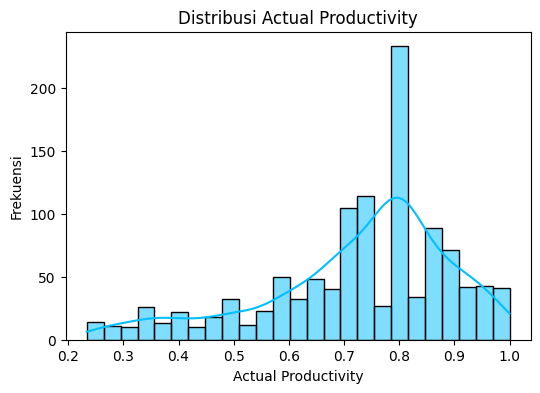

In [236]:
# Menguji distribusi data dengan grafik
plt.figure(figsize=(6,4))
sns.histplot(data=data_clean, x='actual_productivity', bins=25, kde=True, color='deepskyblue')
plt.title('Distribusi Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frekuensi')
plt.show()

In [237]:
# Menguji distribusi data dengan uji statistik
statistic, p_value = shapiro(data['actual_productivity'])
alpha = 0.050
if p_value > alpha:
    print(f"p-value ({p_value:.3f}) > alpha ({alpha}), maka H0 diterima yang berarti data berdistribusi normal.")
else:
    print(f"p-value ({p_value:.3f}) < alpha ({alpha}), maka H0 ditolak yang berarti data tidak berdistribusi normal.")

p-value (0.000) < alpha (0.05), maka H0 ditolak yang berarti data tidak berdistribusi normal.


## Korelasi Antarvariabel

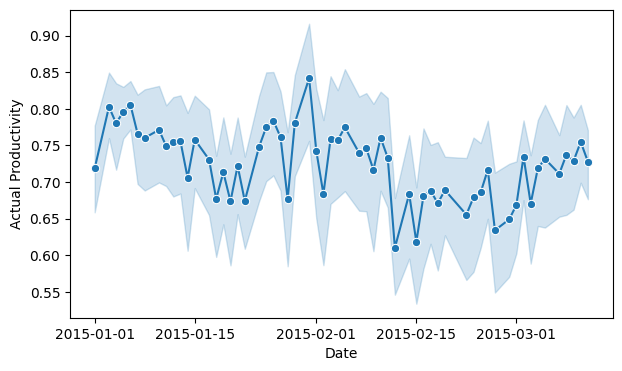

In [238]:
#Korelasi date dengan actual productivity
plt.figure(figsize=(7,4))
sns.lineplot(x='date', y='actual_productivity', data=data_clean, marker='o')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.show()

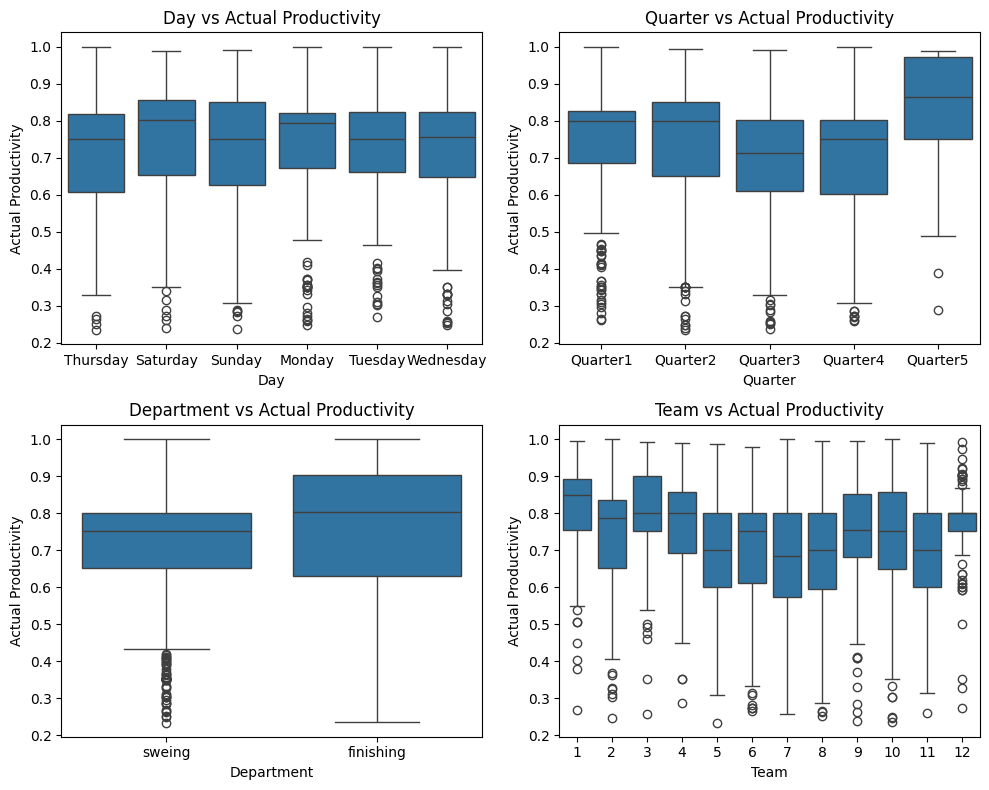

In [239]:
#Korelasi variabel kategorik dengan actual productivity
cat_columns = ['day', 'quarter', 'department', 'team']
plt.figure(figsize=(10, 8))

for i, col in enumerate(cat_columns , start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_clean[col], y=data_clean['actual_productivity'])
    plt.title(f"{col.capitalize()} vs Actual Productivity")
    plt.xlabel(col.capitalize())
    plt.ylabel('Actual Productivity')
plt.tight_layout()
plt.show()

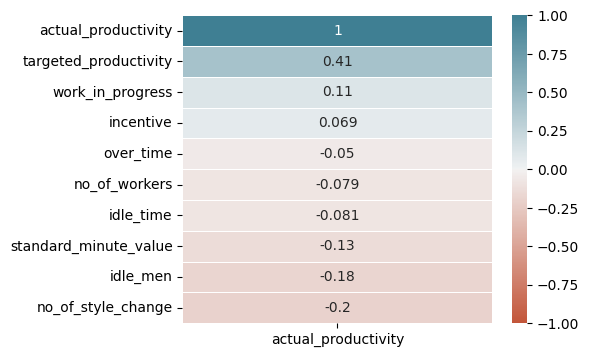

In [240]:
#Korelasi variabel numerik  dengan actual productivity
data_numerik = data_clean.select_dtypes(include=['number']).drop(['team'], axis=1)
matriks_korelasi = data_numerik.corr()
#Matriks Korelasi
plt.figure(figsize=(5, 4))
sns.heatmap(matriks_korelasi[['actual_productivity']].sort_values(by='actual_productivity', ascending=False),
            vmin=-1, vmax=1, annot=True, linewidths=.5, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

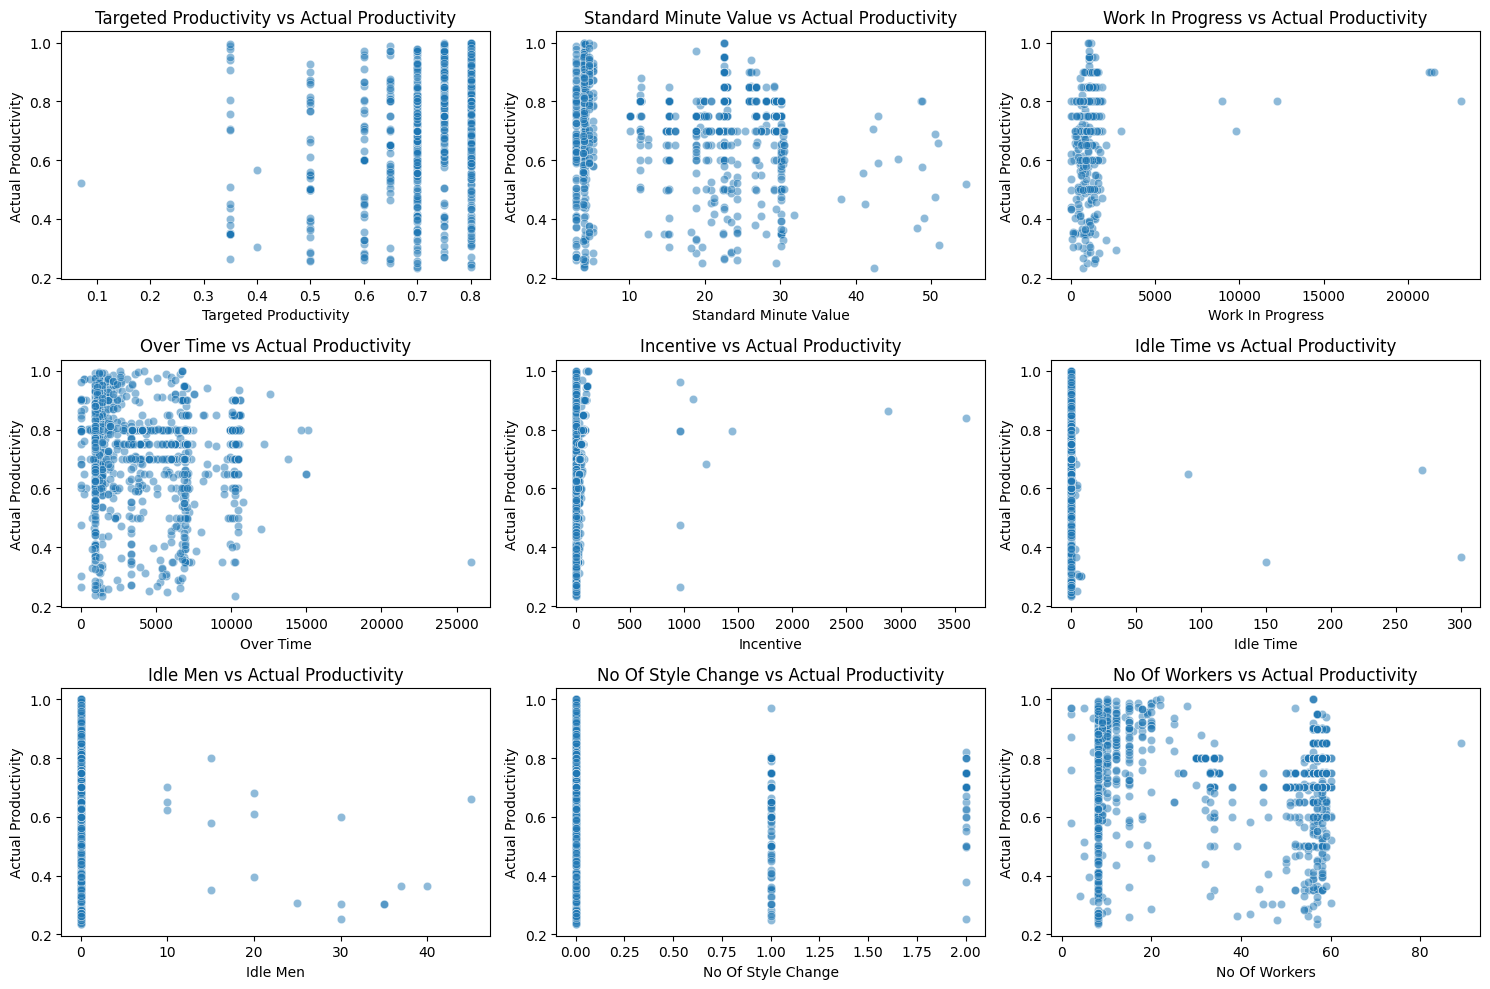

In [241]:
#Grafik Korelasi
num_columns = ['targeted_productivity','standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
               'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, start=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data_clean[col], y=data_clean['actual_productivity'], alpha = .5)
    plt.title(f"{col.replace('_',' ').title()} vs Actual Productivity")
    plt.xlabel(col.replace('_',' ').title())
    plt.ylabel('Actual Productivity')
plt.tight_layout()
plt.show()

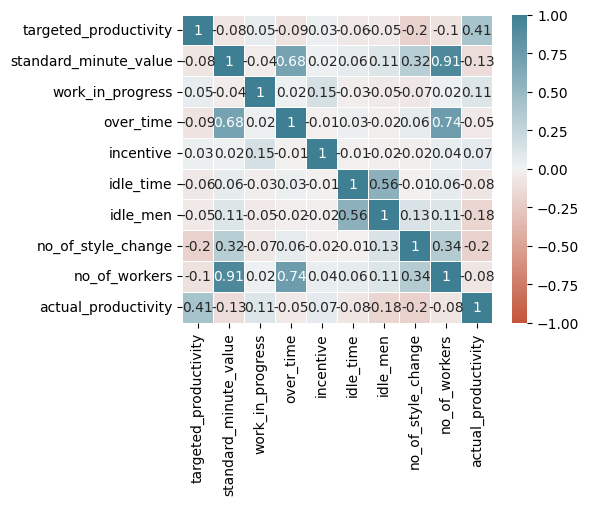

In [242]:
#Korelasi antarvariabel numerik
num_data = data_clean.select_dtypes(include=['number']).drop(['team'], axis=1)
#Matriks Korelasi
plt.figure(figsize=(5, 4))
sns.heatmap(round(num_data.corr(), 2), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

#Data Prepocessing

In [243]:
data_clean = data_clean.drop(columns=['date', 'work_in_progress'])
data_clean.head(10)

,quarter,department,day,team,targeted_productivity,standard_minute_value,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382
5,Quarter1,sweing,Thursday,7,0.80,25.90,6720,38,0.0,0,0,56,0.800125
6,Quarter1,finishing,Thursday,2,0.75,3.94,960,0,0.0,0,0,8,0.755167
7,Quarter1,sweing,Thursday,3,0.75,28.08,6900,45,0.0,0,0,58,0.753683
8,Quarter1,sweing,Thursday,2,0.75,19.87,6000,34,0.0,0,0,55,0.753098
9,Quarter1,sweing,Thursday,1,0.75,28.08,6900,45,0.0,0,0,58,0.750428


In [244]:
#Melakukan encoding untuk data kategorik
data_encode = data_clean.copy()
cat_columns = ['quarter', 'department', 'day']

label_encoders = {}

for col in cat_columns:
    label_encoder = LabelEncoder()
    data_encode[col] = label_encoder.fit_transform(data_encode[col])
    label_encoders[col] = {index: label for index, label in enumerate(label_encoder.classes_)}

for col, encoder in label_encoders.items():
    print(f"Label {col}:")
    print(encoder)
    print()

Label quarter:
{0: 'Quarter1', 1: 'Quarter2', 2: 'Quarter3', 3: 'Quarter4', 4: 'Quarter5'}

Label department:
{0: 'finishing', 1: 'sweing'}

Label day:
{0: 'Monday', 1: 'Saturday', 2: 'Sunday', 3: 'Thursday', 4: 'Tuesday', 5: 'Wednesday'}



In [245]:
# Ambil kolom numerik
num_columns = ['targeted_productivity', 'standard_minute_value', 'over_time',
               'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
               'no_of_workers']
x_numeric = data_encode[num_columns]

# Ambil kolom kategorikal
other = data_encode.drop(columns=num_columns)

# Standarisasi kolom numerik
std_scaler = StandardScaler()
x_scaled_numeric = std_scaler.fit_transform(x_numeric)

# Gabungkan kembali dengan kolom kategorikal
data_scaled = pd.DataFrame(x_scaled_numeric, columns=num_columns)
data_scaled = pd.concat([other.reset_index(drop=True), data_scaled], axis=1)

# Tampilkan hasil
data_scaled.head(10)

,quarter,department,day,team,actual_productivity,targeted_productivity,standard_minute_value,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,1,3,8,0.940725,0.730501,1.013199,0.744997,0.375928,-0.058385,-0.114816,-0.357888,1.113630
1,0,0,3,1,0.886500,0.223876,-1.006800,-1.075334,-0.228150,-0.058385,-0.114816,-0.357888,-1.188661
2,0,1,3,11,0.800570,0.730501,-0.327710,-0.272247,0.080053,-0.058385,-0.114816,-0.357888,-0.195516
3,0,1,3,12,0.800570,0.730501,-0.327710,-0.272247,0.080053,-0.058385,-0.114816,-0.357888,-0.195516
4,0,1,3,6,0.800382,0.730501,0.989562,-0.789792,0.080053,-0.058385,-0.114816,-0.357888,0.978201
5,0,1,3,7,0.800125,0.730501,0.989562,0.637918,0.006084,-0.058385,-0.114816,-0.357888,0.978201
6,0,0,3,2,0.755167,0.223876,-1.006800,-1.075334,-0.228150,-0.058385,-0.114816,-0.357888,-1.188661
7,0,1,3,3,0.753683,0.223876,1.187744,0.691458,0.049233,-0.058385,-0.114816,-0.357888,1.068487
8,0,1,3,2,0.753098,0.223876,0.441381,0.423762,-0.018572,-0.058385,-0.114816,-0.357888,0.933058
9,0,1,3,1,0.750428,0.223876,1.187744,0.691458,0.049233,-0.058385,-0.114816,-0.357888,1.068487


In [246]:
#Memisahkan variabel x dan variabel y
x = data_scaled.drop(columns=['actual_productivity'])
y = data_scaled['actual_productivity']

#Membagi menjadi data test dan data train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1000)
print(f"Jumlah x train: {len(x_train)}")
print(f"Jumlah x test: {len(x_test)}")
print(f"Jumlah y train: {len(y_train)}")
print(f"Jumlah y test: {len(y_test)}")

Jumlah x train: 986
Jumlah x test: 174
Jumlah y train: 986
Jumlah y test: 174


#Model

##Linear Regression

In [157]:
linreg_model = LinearRegression()
linreg_model.fit(x_train, y_train)
linreg_pred = linreg_model.predict(x_test)

##KNN

In [215]:
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2, 3]
}
knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=knn_params,
    n_jobs=1,
    verbose=1,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
knn_grid_search.fit(x_train, y_train)
knn_grid_search.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KNeighborsRegressor(leaf_size=20, n_neighbors=11, p=1, weights='distance')

In [194]:
knn_model = knn_grid_search.best_estimator_
knn_pred = knn_model.predict(x_test)

##Decision Tree

In [195]:
dectree = DecisionTreeRegressor(random_state = 0)
dectree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
dectree_grid_search = GridSearchCV(
    estimator=dectree,
    param_grid=dectree_params,
    n_jobs=1,
    verbose=1,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
dectree_grid_search.fit(x_train, y_train)
dectree_grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, random_state=0)

In [196]:
dectree_model = dectree_grid_search.best_estimator_
dectree_pred = dectree_model.predict(x_test)

##Random Forest

In [247]:
rf = RandomForestRegressor(random_state = 500)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    n_jobs=1,
    verbose=1,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
rf_grid_search.fit(x_train, y_train)
rf_grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=200, random_state=500)

In [248]:
rf_model = rf_grid_search.best_estimator_
rf_pred = rf_model.predict(x_test)

##SVM RBF

In [204]:
svm = SVR(kernel = 'rbf')
svm_params = {
    'C': [0.1, 1, 5, 10],
    'gamma': [0.1, 0.5, 1, 1.5, 2]
}
svm_grid_search = GridSearchCV(
    estimator=svm,
    param_grid=svm_params,
    n_jobs=1,
    verbose=1,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
svm_grid_search.fit(x_train, y_train)
svm_grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


SVR(C=0.1, gamma=0.1)

In [205]:
svm_model = svm_grid_search.best_estimator_
svm_pred = svm_model.predict(x_test)

##MLP

In [208]:
mlp = MLPRegressor(random_state=0)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'identity'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01, 0.05],
}
mlp_grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=mlp_params,
    n_jobs=1,
    verbose=1,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)
mlp_grid_search.fit(x_train, y_train)
mlp_grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(100, 50),
             random_state=0)

In [209]:
mlp_model = mlp_grid_search.best_estimator_
mlp_pred = mlp_model.predict(x_test)

#Evaluasi Model

In [210]:
# Membuat fungsi fungsi SMAPE
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [216]:
# Misalkan y_test dan y_preds adalah list/array yang berisi nilai target sebenarnya dan nilai prediksi dari masing-masing model
models = ['Linear_Regression', 'KNN', 'Decision_Tree', 'Random_Forest', 'SVM_RBF', 'MLP']
y_tests = [y_test, y_test, y_test, y_test, y_test, y_test]  # y_test dari masing-masing model
y_preds = [linreg_pred, knn_pred, dectree_pred, rf_pred, svm_pred, mlp_pred]  # y_pred dari masing-masing model

# Siapkan list untuk menampung hasil evaluasi
results = []

# Evaluasi dan tambahkan hasil RMSE dan SMAPE untuk setiap model ke dalam list
for i, model_name in enumerate(models):
    mse = mean_squared_error(y_tests[i], y_preds[i])
    rmse = np.sqrt(mse)
    smape_value = smape(y_tests[i], y_preds[i])

    results.append({
        'Model': model_name,
        'RMSE': rmse,
        'SMAPE': smape_value
    })

# Buat dataframe dari list hasil evaluasi
results_df = pd.DataFrame(results)

# Cetak dataframe
print(results_df.to_string(index=False, float_format='%.3f'))


            Model  RMSE  SMAPE
Linear_Regression 0.156 17.103
              KNN 0.150 15.587
    Decision_Tree 0.151 15.901
    Random_Forest 0.130 13.289
          SVM_RBF 0.151 16.652
              MLP 0.146 15.431
